In [ ]:

N = np.array([11, 12, 14, 12, 13, 14])
Z = np.array([11, 11, 11, 12, 12, 12])

print(N%2)
print(Z%2)


In [310]:

import pandas as pd

element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/24Na.csv', error_bad_lines=False)
print(element_file[' energy [keV] '].iloc[-1])
element_file[' energy [keV] '][0]

12540.0


0.0

In [314]:

element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/63Zn.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)
print(element_file['energy'].iloc[-1])
element_file['energy'][1]

9774


'0'

In [188]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.integrate import quad
from scipy.optimize import curve_fit






def z_1d( E, T ):
    '''First derivative of the partition function'''
    
    suma = 0
    
    for e in E:
        suma += e * np.exp(-e/T)
        
    return suma


############################################################################################################ 


def g_1d(E, T, a, P_N, P_Z):
    '''Definition of the first derivative of the first function with respect to E'''
    
    U = E - P_N - P_Z
    
    g = (np.sqrt(np.pi)/12.) * ( (2. * np.sqrt(a * U))/( a**(0.25) * U**(1.25)) )
    
    return E*np.exp(-E/T) *  g


#############################################################################################################



def g_2d(E, T, sigma, E_0, tau):
    '''Definition of the first derivative of the second function with respect to E'''
    
    g = ( (np.sqrt(2. * np.pi) * sigma) / tau ) * (np.exp(E - E_0)/tau )
    
    return  E*np.exp(-E/T) * g 

    
#############################################################################################################    




def z_1(E, T):
    '''First term of the partition function'''
    
    suma = 0
    
    for e in E:
        suma += np.exp(-e/T)
        
    return suma
  
############################################################################################################ 






def g_1(E, T, a, P_Z, P_N):
    '''Definition of the first density function'''
    
    U = E - P_N - P_Z
    
    g = (np.sqrt(np.pi)/12.) * ( (2. * np.sqrt(a * U))/( a**(0.25) * U**(1.25) ) ) 
    
    return np.exp(-E/T) * g
    
#############################################################################################################   






def g_2(E, T, sigma, E_0, tau):
    '''Definition of the second density function'''
    
    g = ( (np.sqrt(2. * np.pi) * sigma) / tau ) * (np.exp(E - E_0)/tau )
    
    return np.exp(-E/T) * g
    
#############################################################################################################  





def binding(P, T, alfa, beta, gamma, eta, delta):
    '''Binding energy function - Semiempirical mass formula'''

    
    
    
    N , Z = P
    
    A = N + Z
    #print(A)
    t = (0.5) * (Z - N)
    #print(t)
    R = 1.07 * (1 + 0.01 * T)
    #print(R)
    
    '''
    if A%2 != 0:
        f = 0
        
    if (N%2 == 0 and Z%2 == 0):
        f = -1
        
    if (N%2 != 0 and Z%2 != 0):
        f = 1
    '''    
    
    
    f =  (N%2 + Z%2) -  np.ones(len(A))
    #print(f)
    
    return alfa * A**(3/4) + beta * A**(2/3) + (gamma - (eta/A**(1/3)))*( (4*t**2 + 4*np.abs(t))/A ) + (Z**2)/(R * A**(1/3))*(1 - 0.7636/(Z**(2/3)) - 2.29/(R * A**(1/3))**2) + delta*(f/A**(3/4))
    

############################################################################################################ 



'''Temperature in MeV (1, 4)'''
T = np.linspace(1, 4, 10)


'''A list of Y values is created to organized the total energy: Excitation Energy + Binding Energy(T=0) 
for all ts'''

Y = []

for t in T:
    t = np.round(t, 2)
   

    '''Properties of the nuclei
       [B_0, P(Z), P(N), a, E_0, sigma, N, Z, tau]'''
    
    
    
    '''For light nuclei'''
    light_nuclei = {'22Na' : [7.91, 0, 0, 3.13, -2.00, 1.9, 11, 11, 2.23], '23Na' : [8.11, 0, 2.67, 3.68, -0.40, 2.0, 12, 11, 2.68],
                    '25Na' : [8.10, 0, 1.80, 4.03, -0.70, 2.1, 14, 11, 1.91], '24Mg' : [8.25, 2.46, 2.67, 3.32, 2.80, 2.0, 12, 12, 2.18], '25Mg' : [8.22, 2.46, 0, 3.85, -1.00, 2.15, 13, 12, 2.12],
                    '26Mg' : [8.33, 2.46, 1.80, 4.08, 0.50, 2.25, 14, 12, 2.07], '27Mg' : [8.26, 2.46, 0, 4.00, -0.80, 2.25, 15, 12, 2.04], '26Al' : [8.15, 0, 0, 3.65, -1.80, 2.0, 13, 13, 1.95],
                    '27Al' : [8.33, 0, 1.80, 3.45, -0.35, 2.0, 14, 13, 2.08], '28Al': [8.31, 0, 0, 0, -0.70, 2.2, 15, 13, 1.50], '29Al' : [8.35, 0, 1.67, 4.08, -0.65, 2.2, 16, 13, 1.88],
                    '28Si' : [8.45, 2.09, 1.80, 3.05, 3.20, 2.0, 14, 14, 2.09], '29Si' : [8.45, 2.09, 0, 3.57, 0.75, 2.1, 15, 14, 1.91], '30Si' : [8.52, 2.09, 1.67, 3.81, 1.10, 2.25, 16, 14, 2.04],
                    '31Si' : [8.46, 2.09, 0, 4.05, 0.40, 2.15, 17, 14, 1.79], '30P' : [8.35, 0, 0, 3.47, -1.00, 1.9, 15, 15, 1.89], '31P' : [8.48, 0, 1.67, 3.87, 0.40, 2.0, 16, 15, 1.78],
                    '32P' : [8.46, 0, 0, 3.45, -1.75, 2.0, 17, 15, 1.96], '32S' : [8.49, 1.62, 1.67, 3.39, 1.75, 2.0, 16, 16, 2.05], '33S' : [8.50, 1.62, 0, 4.36, 0.0, 2.2, 17, 16, 1.68],
                    '34S' : [8.58, 1.62, 1.86, 4.12, 1.84, 2.2, 18, 16, 1.77], '34Cl' : [8.40, 0, 0, 3.72, -1.61, 2.15, 17, 17, 1.92], '35Cl' : [8.52, 0, 1.86, 4.11, 0.31, 2.2, 18, 17, 1.76],
                    '37Cl' : [8.57, 0, 2.04, 4.88, 1.15, 2.1, 20, 17, 1.40], '38Cl' : [8.50, 0, 0, 5.41, -0.99, 2.2, 21, 17, 1.31],
                    '36Ar': [8.52, 1.62, 1.86, 4.03, 2.46, 2.1, 18, 18, 1.69], '37Ar' : [8.53, 1.62, 0, 4.41, -0.34, 2.35, 19, 18, 1.73], '38Ar' : [8.61, 1.62, 2.04, 4.80, 0.91, 2.5, 20, 18, 1.73],
                    '39Ar': [8.56, 1.62, 0, 5.34, -0.04, 2.4, 21, 18, 1.44], '40Ar' : [8.59, 1.62, 1.64, 6.70, 1.00, 2.65, 22, 18, 1.28], '41Ar' : [8.53, 1.62, 0, 5.74, -0.50, 2.55, 23, 18, 1.43],
                    '38K' : [8.44, 0, 0, 4.29, -0.94, 2.15, 19, 19, 1.59], '39K' : [8.56, 0, 2.04, 4.68, 0.95, 2.2, 20, 19, 1.50], '40K' : [8.54, 0, 0, 5.34, -0.90, 2.2, 21, 19, 1.31], 
                    '41K' : [8.58, 0, 1.64, 5.78, -1.48, 2.7, 19, 22, 1.55], '42K' : [8.55, 0, 0, 5.56, -2.27, 2.6, 23, 19, 1.49], '41Ca' : [8.55, 1.83, 0, 5.44, -0.50, 2.5, 21, 20, 1.52],
                    '42Ca': [8.62, 1.83, 1.64, 6.58, 0.50, 2.75, 22, 20, 1.39], '43Ca': [8.60, 1.83, 0, 6.91, -1.45, 2.9, 23, 20, 1.37], '44Ca' : [8.66, 1.83, 1.44, 6.34, 0.30, 2.8, 24, 20 ,1.43],
                    '45Ca': [8.63, 1.83, 0, 7.11, -0.44, 2.75, 25, 20, 1.23], '41Sc': [8.37, 0, 2.04, 5.63, 0.20, 2.5, 20, 21, 1.41], '43Sc' : [8.53, 0, 1.64, 6.55, -0.61, 2.65, 22, 21, 1.31],
                    '44Sc' : [8.56, 0, 0, 6.97, -1.88, 2.65, 23, 21, 1.20], '45Sc' : [8.62, 0, 1.44, 7.59, -1.45, 2.9, 24, 21, 1.24], '46Sc' : [8.24, 0, 0, 6.33, -2.28, 2.75, 25, 21, 1.35],
                    '47Sc' : [8.66, 0, 1.54, 7.08, -1.10, 2.85, 26, 21, 1.28], '45Ti' : [8.55, 1.73, 0, 6.84,-0.83, 2.8, 23, 22, 1.30], '46Ti' : [8.66, 1.73, 1.44, 6.93, 1.14, 2.7, 24, 22, 1.23],
                    '47Ti' : [8.66, 1.73, 0, 5.97, -1.00, 2.8, 25, 22, 1.47], '48Ti' : [8.72, 1.73, 1.54, 6.93, 0.52, 2.85, 25, 22, 1.32], '49Ti' : [8.71, 1.73, 0 , 6.11, -0.83, 2.8, 27, 22, 1.30],
                    '47V' : [8.58, 0, 1.44, 6.79, -1.13, 2.8, 24, 23, 1.32], '48V' : [8.62, 0, 0, 6.77, -1.28, 2.6, 25, 23, 1.14], '49V' : [8.68, 0, 1.54, 6.76, -1.33, 2.9, 26, 23, 1.35],
                    '50V' : [8.69, 0, 0, 6.67, -1.48, 2.65, 27, 23, 1.19], '51V' : [8.74, 0, 1.30, 6.72, -0.15, 2.7, 28, 23, 1.18], '50Cr' : [8.70, 1.35, 1.54, 6.54, 0.43, 2.85, 26, 24, 1.34],
                    '51Cr': [8.71, 1.35, 0, 6.44, -0.78, 2.8, 27, 24, 1.32], '52Cr' : [8.77, 1.35, 0, 6.15, 0.02, 2.9, 28, 24, 1.43], '53Cr' : [8.76, 1.35, 0, 5.88, -0.65, 2.8, 29, 24, 1.40],
                    '54Cr': [8.78, 1.35, 1.27, 6.96, 0.65, 2.9, 30, 24, 1.24], '55Cr' : [8.73, 1.35, 0, 7.52, -0.47, 2.9, 31, 24, 1.13], '51Mn' : [8.63, 0, 1.54, 6.29, 0.26, 2.6, 26, 25, 1.22],
                    '52Mn': [8.67, 0, 0, 6.29, 0.26, 2.6, 27, 25, 1.22], '53Mn' : [8.73, 0, 1.30, 5.87, 0.50, 2.45, 28, 25, 1.21], '54Mn' : [8.74, 0, 0, 6.21, -1.49, 2.7, 29, 25, 1.27],
                    '55Mn': [8.76, 0, 1.27, 7.41, -0.50, 2.9, 30, 25, 1.14], '56Mn' : [8.74, 0, 0, 7.41, -0.50, 2.9, 31, 25, 1.14], '54Fe': [8.74, 1.54, 1.30, 6.13, 0.60, 2.9, 28, 26, 1.39],
                    '55Fe': [8.75, 1.54, 0, 5.76, -1.25, 3.0, 29, 26, 1.53], '56Fe' : [8.79, 1.54, 1.27, 6.75, 0.80, 2.9, 30, 26, 1.26], '57Fe' : [8.77, 1.54, 0, 6.91, -1.60, 3.2, 31, 26, 1.37],
                    '58Fe': [8.79, 1.54, 1.29, 7.65, 0.60, 3.05, 32, 26, 1.17], '59Fe' : [8.75, 1.54, 0, 7.33, -1.20, 3.15, 33, 26, 1.27], '56Co' : [8.69, 0, 0, 5.51, -0.96, 2.6, 29, 27, 1.31],
                    '57Co': [8.74, 0, 1.27, 5.95, 0.05, 2.7, 30, 27, 1.27], '59Co' : [8.77, 0, 1.29, 8.04, -0.40, 3.0, 32, 27, 1.06], '60Co' : [8.75, 0, 0, 7.23, -1.56, 2.9, 33, 27, 1.14],
                    '58Ni': [8.73, 1.20, 1.27, 5.44, -0.17, 2.95, 30, 28, 1.59], '59Ni' : [8.74, 1.20, 0, 5.97, -1.75, 3.1, 31, 28, 1.51], '60Ni' : [8.78, 1.20, 1.29, 6.54, 0.01, 3.05, 32, 28, 1.36],
                    '61Ni': [8.76, 1.20, 0, 6.94, -1.25, 3.1, 33, 28, 1.29], '62Ni' : [8.79, 1.20, 1.41, 7.59, 0.77, 3.0, 34, 28, 1.13], '64Ni' : [8.78, 1.20, 1.50, 8.52, 1.20, 3.0, 36, 28, 0.99],
                    '62Cu': [8.72, 0, 0, 7.19, -1.00, 2.75, 33, 29, 1.06], '63Cu' : [8.75, 0, 1.41, 8.88, -0.25, 3.1, 34, 29, 0.98], '64Cu' : [8.74, 0, 0, 8.09, -1.25, 2.9, 35, 29, 0.995],
                    '65Cu': [8.76, 0, 1.50, 8.70, 0.03, 3.05, 36, 29, 0.97], '66Cu' : [8.73, 0, 0, 8.33, -1.02, 2.9, 37, 29, 0.94]}
    
    
    '''It contains the values for a particular t for light nuclei'''
    y = []  
    
    for el_l in light_nuclei:
        
        
        '''We convert to float and remove the NaN terms'''
        
        element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+el_l+'.csv', error_bad_lines=False)
    
        element_file[' energy [keV] '] = pd.to_numeric(element_file[' energy [keV] '], errors='coerce')
    
        element_file.dropna(subset = [' energy [keV] '], inplace=True) 
    
        
        '''We see which density formula is to be used'''
        
        U_x = 2.5 + (150./( light_nuclei[el_l][6] + light_nuclei[el_l][7] ))
            
        E_x = (U_x + light_nuclei[el_l][1] + light_nuclei[el_l][2])
        
        '''[B_0, P(Z), P(N), a, E_0, sigma, N, Z, tau]'''
        
        
        if (element_file[' energy [keV] '].iloc[-1]/1000) > E_x:
            #print(el_l+'(g(a))')
            #print('Cumple Primera')
            
            '''Data(E, T, a, P_Z, P_N)'''
            
            intr_0 = quad(g_1, element_file[' energy [keV] '].iloc[-1]/1000, element_file[' energy [keV] '].iloc[-1]/1000 + 10, 
                              args=(t, light_nuclei[el_l][3], light_nuclei[el_l][1], light_nuclei[el_l][2]))[0]
            
            intr_1 = quad(g_1d, element_file[' energy [keV] '].iloc[-1]/1000, element_file[' energy [keV] '].iloc[-1]/1000 + 10, 
                              args=(t, light_nuclei[el_l][3], light_nuclei[el_l][1], light_nuclei[el_l][2]))[0]
            
            #print(intr_1)
            #print(intr_0)
            
            #print('\n')
            
        else:
            #print(el_l+r'(g($\tau$))')
            #print('Cumple Segunda')
            
            '''Data(E, T, sigma, E_0, tau)'''
            intr_0 = quad(g_2, element_file[' energy [keV] '].iloc[-1]/1000, E_x, 
                              args=(t, light_nuclei[el_l][5], light_nuclei[el_l][4], light_nuclei[el_l][8]))[0]
            
            intr_1 = quad(g_2d, element_file[' energy [keV] '].iloc[-1]/1000, E_x, 
                              args=(t, light_nuclei[el_l][5], light_nuclei[el_l][4], light_nuclei[el_l][8]))[0]
            
            #print(intr_1)
            #print(intr_0)
            
            #print('\n')
            
           
            
        E_y = ( z_1d(element_file[' energy [keV] '][1:]/1000, t ) + intr_1 )/( 1.00 + z_1(element_file[' energy [keV] '][1:]/1000, t) + intr_0 )
            
            #print(E_y)
            #E_y = -(elements_pro[el][0])*(elements_pro[el][6] + elements_pro[el][7] ) + (1 / ( z_1( (element_file['energy'][2:]/1000), t) + intr_0) ) *  ( z_1d( (element_file['energy'][2:]/1000), t) + intr_1 )
            
        y.append( E_y  - element_file[' energy [keV] '][0] )
            
            
       
    
    '''For heavy nuclei'''

    heavy_nuclei = {'63Zn' : [8.69, 1.06, 0, 7.45, -0.44, 3.0, 33, 30, 1.10] , '64Zn' : [8.73, 1.06, 1.41, 8.03, 0.99, 3.0, 34, 30, 1.04],  '65Zn' : [8.72, 1.06, 0, 8.57, -1.11, 3.2, 35, 30, 1.07],
                    '66Zn' : [8.75, 1.06, 1.50, 8.99, 1.50, 2.9, 36, 30, 0.89],   '67Zn' : [8.73, 1.06, 0, 9.39, -0.73, 3.2, 37, 30, 0.95], '68Zn' : [8.75, 1.06, 1.50, 9.75, 1.19, 3.1 , 38, 30, 0.88],
                    '69Ga' : [8.72, 0, 1.50, 10.21, 0.08, 3.15, 38, 31, 0.855], '71Ga' : [8.72, 0, 1.43, 10.76, 0.05, 3.2, 40, 31, 0.815], '70Ge' : [8.72, 1.36, 1.50, 10.74, 0.89, 3.35, 38, 32, 0.855],
                    '72Ge' : [8.73, 1.36, 1.43, 11.30, 0.88, 3.40, 40, 32, 0.845], '74Ge' : [8,72, 1.36, 1.88, 12.48, 0.84, 3.65, 42, 32, 0.83],'75As' : [8.70, 0, 1.88, 11.95, -1.24, 3.75, 42, 33, 0.92],
                    '75Se' : [8.68, 1.43 , 0, 12.02, -0.76, 3.55, 41, 34, 0.835],'76Se' : [8.71, 1.43, 1.88 , 12.11, 0.60, 3.75, 42, 34, 0.875],'77Se' : [8.69, 1.43, 0, 11.80, -0.68, 3.6, 43, 34, 0.84],
                    '78Se' : [8.72, 1.43, 1.47, 11.88, 0.94, 3.55, 44, 34, 0.82], '80Se' : [8.71, 1.43, 1.57, 11.89, 0.57, 3.70, 46, 34, 0.865],'79Br' : [8.69, 0, 1.47, 12.48, -0.98, 3.75, 44, 35, 0.835],
                    '84Kr' : [8.72, 1.17, 1.46, 11.36, 1.20, 3.45, 48, 36, 0.79 ],'83Rb' : [8.67, 0, 1.57, 12.70, -0.04, 3.55, 46, 37, 0.745],'85Sr': [8.67, 1.24, 0, 12.19, -0.01, 3.4, 47, 38, 0.725],
                    '92Zr' : [8.50, 1.20, 0.72, 11.17, 1.01, 3.35, 52, 40, 0.74 ],'94Zr' : [8.67, 1.20, 1.12, 12.15, 0.84, 3.65, 54, 40, 0.76 ], '93Nb': [8.66, 0, 0.72, 10.88, -0.12, 3.3, 52, 41, 0.745],
                    '93Mo' : [8.65, 1.28, 0, 10.13, 0.43, 3.3, 51, 42, 0.79],  '95Mo' : [8.65, 1.28, 0, 11.36, -0.87, 3.8, 53, 42, 0.87 ], '96Mo': [8.65, 1.28, 1.12, 12.67, 1.01, 3.7, 54, 42, 0.725],
                    '97Mo' : [8.63, 1.28, 0, 12.93, -0.01, 3.6, 55, 42, 0.70 ], '99Mo' : [8.61, 1.28, 0, 14.17, -0.66, 3.95, 57,42, 0.72],'101Mo': [8.57, 1.28, 0, 15.48, -0.51, 4.0, 59, 42, 0.66],
                    '99Ru' : [8.61, 1.28, 0, 12.68, -0.27, 3.8, 55, 44, 0.745], '100Ru': [8.62, 1.28, 1.29, 13.30, 0.95, 3.8, 56, 44, 0.725], '101Ru': [8.60, 1.28, 0, 13.93, -0.83, 4.0, 57, 44, 0.745],
                    '102Ru': [8.61, 1.28, 0.94, 15.13, 0.80, 3.85, 58, 44, 0.64], '103Rh': [8.58, 0, 0.94, 14.70, -0.36, 3.75, 58, 45, 0.64],'104Rh': [8.57, 0, 0, 15.30, -1.11, 3.75, 59, 45, 0.60],
                    '105Rh': [8.57, 0, 1.24, 16.06, -0.24, 3.95, 60, 45, 0.615],'104Pd': [8.58, 1.35, 0.94, 14.55, 0.90, 3.85, 58, 46, 0.655 ],'105Pd': [8.57, 1.35, 0, 15.16, -0.90, 4.2, 59, 46, 0.72],
                    '106Pd': [8.58, 1.35, 1.24, 15.64, 0.78, 4.1, 60, 46, 0.66],  '108Pd': [8.57, 1.35, 1.25, 17.01, 0.47, 4.3, 62, 46, 0.66 ], '107Ag': [8.55, 0, 1.18, 15.71, 0.08, 3.8, 60, 47, 0.59],
                    '108Ag': [8.54,    0,    0, 15.14, -0.76,3.6, 61, 47, 0.56],  '109Ag': [8.55, 0, 1.25, 16.80, -0.41, 4.1, 62, 47, 0.61 ],'111Ag': [8.53, 0, 1.14, 17.51, -0.31, 4.05, 64, 47, 0.575],
                    '108Cd': [8.55, 1.36, 1.24, 15.47, 1.20, 3.95, 60, 48, 0.625], '109Cd': [8.54, 1.36, 0, 16.12, -0.80, 4.25, 61, 48, 0.675 ],'110Cd':[8.55, 1.36, 1.25, 16.56, 0.95, 4.1, 62, 48, 0.62],
                    '111Cd': [8.54, 1.36, 0, 16.94, -0.39, 4.15, 63, 48, 0.615],'112Cd': [8.54, 1.36, 1.14, 15.82, 0.77, 4.15, 64, 48, 0.65], '114Cd':[8.54, 1.36, 1.32, 17.43, 0.59, 4.35, 66, 48, 0.635],
                    '115In': [8.52, 0, 1.14, 17.44, 0.15, 4.0, 66, 49, 0.55],  '117In':[8.50, 0, 1.15, 17.38, 0.11, 3.9, 68, 49, 0.535], '116Sn': [8.52, 1.19, 1.32, 14.90, 0.92, 4.15, 66, 50, 0.665],
                    '117Sn': [8.51, 1.19, 0, 16.70, 0.23, 3.9, 67, 50, 0.545], '118Sn':[8.52, 1.19, 0.94, 16.22, 1.16, 4.0, 68, 50, 0.58],'119Sn': [8.50, 1.19, 0, 18.01, 0.14, 4.0, 69, 50, 0.525],
                    '120Sn': [8.50, 1.19, 1.24, 16.57, 1.31, 4.0, 70, 50, 0.565], '123Te':[8.47, 1.14, 0, 17.81, -0.43, 4.35, 71, 52, 0.58], '124Te': [8.47, 1.14, 1.43, 16.81, 0.85, 4.35, 72, 52, 0.62],
                    '125Te': [8.46, 1.14, 0, 16.24, -0.85, 4.4, 73, 52, 0.66], '127I': [8.45, 0, 1.09, 16.92, -0.42, 4.3, 74, 53, 0.60], '129I': [8.44, 0, 1.20, 15.87, -0.45, 4.3, 76, 53, 0.64],
                    '131I': [8.42, 0, 1.04, 13.82, 0.11, 3.95, 78, 53, 0.63], '129Xe': [8.43, 1.12, 0, 17.68, -0.35, 4.25, 75, 54, 0.75], '131Xe': [8.42, 1.12, 0, 16.13, -0.49, 4.35, 77, 54, 0.63],
                    '132Xe': [8.43, 1.12, 1.04, 15.79, 0.89, 4.2, 78, 54, 0.605], '133Xe': [8.41, 1.12, 0, 13.68, 0.15, 3.95, 79, 54, 0.645], '131Cs': [8.42, 0, 1.20, 18.18, -0.52, 4.5, 76, 55, 0.585],
                    '134Cs': [8.40, 0, 0, 15.71, -0.63, 3.85, 79, 55, 0.53], '134Ba': [8.41, 1.58, 1.04, 17.38, 0.64, 4.6, 78, 56, 0.63], '136Ba': [8.40, 1.58, 0.70, 14.37, 1.07, 4.15, 80, 56, 0.645],
                    '138Ba': [8.39, 1.58, 0.85, 17.43, 1.07, 4.15, 82, 56, 0.715], '144Nd': [8.33, 1.18, 0.76, 16.35, 0.86, 4.25, 84, 60, 0.57], '150Nd': [8.23, 1.18, 1.10, 16.90, -0.01, 4.95, 90, 60, 0.595],
                    '147Pm': [8.28, 0, 0.92, 18.46, -0.22, 4.35, 86, 61, 0.525], '149Pm': [8.23, 0, 0.99, 20.09, -0.35, 4.60, 88, 61, 0.510], '151Pm': [8.24, 0, 1.10, 20.74, -0.18, 4.5, 90, 61, 0.495 ],
                    '148Sm': [8.28, 1.22, 0.92, 19.18, 0.70, 4.6, 86, 62, 0.54], '149Sm': [8.26, 1.22, 0, 19.85, -0.61, 4.80, 87, 62, 0.56], '150Sm': [8.26, 1.22, 0.99, 21.90, -0.08, 5.10, 88, 62, 0.555],
                    '151Sm': [8.24, 1.22, 0, 21.27, -0.94, 5.0, 89, 62, 0.56], '152Sm': [8.24, 1.22, 1.10, 22.85, -0.08, 5.2, 90, 62, 0.55], '154Sm': [8.23, 1.22, 0.92, 20.36, -0.05, 5.0, 90, 62, 0.58],
                    '149Eu': [8.25, 0, 0.92, 19.47, -0.13, 4.3, 86, 63, 0.495], '151Eu': [8.24, 0, 0.99, 21.13, -0.55, 4.7, 88, 63, 0.51], '153Eu': [8.23, 0, 1.10, 21.80,-0.64, 4.85, 90, 63 , 0.515],
                    '152Gd': [8.23, 0.97, 0.99, 21.45, 0.18, 4.8, 88, 64, 0.525], '153Gd': [8.22, 0.97, 0, 22.07, -0.81, 4.9, 89, 64, 0.515], '154Gd': [8.22, 0.97, 1.10, 22.12, 0.03, 4.9, 90, 64, 0.535],
                    '155Gd': [8.21, 0.97, 0, 21.75, -0.83, 4.9, 91, 64, 0.525], '156Gd': [8.22, 0.97, 0.92, 21.41, 0.48, 4.75, 92, 64, 0.495], '157Gd': [8.20, 0.97, 0, 21.92, -0.56, 4.85 ,93, 64, 0.50],
                    '158Gd': [8.20, 0.97, 0.73, 20.19, 0.60, 4.6, 94, 64, 0.49], '159Tb': [8.19, 0, 0.73, 20.54, -0.52, 4.6, 94, 65, 0.495], '161Tb': [8.17, 0, 0.70, 19.57, -0.29, 4.4 ,96, 65, 0.49],
                    '160Dy': [8.18, 0.92, 0.73, 21.19, 0.07, 4.8, 94, 66, 0.515], '161Dy': [8.17, 0.92, 0, 20.74, -0.74, 4.8, 95, 66, 0.53], '163Dy': [8.16, 0.92, 0, 21.62, -0.55, 4.85 , 97, 66, 0.50],
                    '164Dy': [8.16, 0.92, 0.87, 19.78, 0.43, 4.8, 98, 66, 0.525], '165Ho': [8.15, 0, 0.87, 20.24, -0.55, 4.8, 98, 67, 0.52], '166Ho': [8.13, 0, 0, 19.01, -0.85, 4.45, 99, 67, 0.485],
                    '163Er': [8.14, 0.62, 0, 22.31, -0.62, 4.7, 95, 68, 0.465], '165Er': [8.14, 0.62, 0, 21.41, -0.50, 4.7, 97, 68, 0.47], '166Er': [8.14, 0.62, 0.87, 20.95, -0.01, 4.85, 98, 68, 0.515],
                    '167Er': [8.13, 0.62, 0, 20.67, -0.39, 4.6, 99, 68, 0.47], '168Er': [8.13, 0.62, 0.61, 19.59, 0.10, 4.65, 100, 68, 0.505], '169Tm': [8.11, 0, 0.61, 20.96, -0.45, 4.6, 100, 69, 0.47],
                    '171Tm': [8.10, 0, 0.69, 20.17, -0.24, 4.5, 102, 69, 0.47], '169Yb': [8.10, 0.68, 0, 22.22, -0.55, 4.8, 99, 70, 0.455], '171Yb': [8.10, 0.68, 0, 21.28, -0.80, 5.0, 101, 70, 0.505],
                    '172Yb': [8.10, 0.68, 0.69, 19.59, 0.50, 4.5, 102, 70, 0.475], '177Yb': [8.05, 0.68, 0, 19.64, -0.58, 4.8, 107, 70, 0.515], '173Lu': [8.08, 0, 0.69, 21.79, -0.33, 4.65, 102, 71, 0.455],
                    '175Lu': [8.07, 0, 0.55, 21.22, -0.28, 4.5, 104, 71, 0.445], '177Lu': [8.05, 0, 0.40, 20.67, -0.34, 4.45, 106, 71, 0.44], '173Hf': [8.07, 0.64, 0, 22.80, -0.55, 4.8, 101, 72, 0.455],
                    '175Hf': [8.06, 0.64, 0, 22.23, -0.68, 4.9, 103, 72, 0.475], '177Hf': [8.05, 0.64, 0, 21.61, -0.15, 4.55, 105, 72, 0.43], '178Hf': [8.05, 0.64, 0.4, 19.24, 0.16, 4.55, 106, 72, 0.485],
                    '179Hf': [8.04, 0.64, 0, 20.26, -0.44, 4.75, 107, 72, 0.485],'180Hf': [8.03, 0.64, 0.73, 19.91, 0.36, 4.7, 108, 72, 0.485],'181Ta': [8.02, 0, 0.73, 21.26, -0.36, 4.8, 106, 73, 0.47],
                    '181W': [8.02, 0.72, 0, 21.70, -0.22, 4.65, 107, 74, 0.445], '182W': [8.02, 0.72, 0.73, 21.30, 0.44, 4.7, 108, 74, 0.46], '183W': [8.01, 0.72, 0, 20.71, -0.64, 4.95, 109, 74, 0.505],
                    '184W': [8.00, 0.72, 0.58, 20.45, 0.1, 4.85, 110, 74, 0.495],'185W': [7.99, 0.72, 0, 20.46, -0.07, 4.6, 111, 74, 0.45],  '187Re': [7.87, 0, 0.86, 21.47, -0.18, 4.75, 112, 75, 0.465],
                    '185Os': [7.98, 0.75, 0, 22.00, -0.65, 4.95, 109, 76, 0.49], '186Os': [7.98, 0.75, 0.58, 21.88, 0.21, 4.9, 110, 76, 0.465], '187Os': [7.93, 0.75, 0, 21.96, -0.5, 4.9, 111, 76, 0.475],
                    '188Os': [7.97, 0.75, 0.86, 22.01, 0.22, 5.0, 112, 76, 0.485], '189Os': [7.96, 0.75, 0, 21.96, -0.75, 5.05, 113, 76, 0.5], '190Os': [7.96, 0.75, 1.13, 21.41, 0.13, 5.3, 114, 76, 0.53],
                    '189Ir': [7.96, 0, 0.86, 22.56, -0.40, 5.05, 112, 77, 0.465], '191Ir': [7.95, 0, 1.13, 21.63, -0.63, 5.25, 114, 77, 0.525], '193Ir': [7.94, 0, 0.84, 19.56, -0.79, 5.15, 116, 77, 0.555],
                    '191Pt': [7.94, 0.71, 0, 21.95, -0.68, 5.05, 113, 78, 0.49], '192Pt': [7.94, 0.71, 1.13, 21.06, 0.27, 5.15, 114, 78, 0.52], '193Pt': [7.93, 0.71, 0, 20.19, -0.80, 5.05, 115, 78, 0.53],
                    '194Pt': [7.94, 0.71, 0.84, 18.98, 0.44, 4.85, 116, 78, 0.515], '195Pt': [7.55, 0.71, 0, 17.82, -0.65, 4.95, 117, 78, 0.57], '196Pt': [7.93, 0.71, 0.79, 19.71, 0.40, 4.9, 118, 78, 0.51],
                    '193Au': [7.92, 0, 1.13, 24.40, -0.04, 5.00, 114, 79, 0.43], '195Au': [7.92, 0, 0.84, 22.33, -0.01, 4.7, 116, 79, 0.43], '197Au': [7.91, 0, 0.79, 19.95, -0.40, 4.9, 118, 79, 0.505],
                    '198Au': [7.91, 0, 0, 17.85, -1.02, 4.8, 119, 79, 0.535], '199Au': [7.91, 0, 0.82, 17.66, -0.17, 4.7, 120, 79, 0.535], '197Hg': [7.91, 0.87, 0, 20.39, -0.30, 4.9, 117, 80, 0.495],
                    '198Hg': [7.91, 0.87, 0.79, 19.14, 0.91, 4.65, 118, 80, 0.475], '199Hg': [7.90, 0.87, 0, 19.09, -0.43, 5.0, 119, 80, 0.535], '200Hg': [7.90, 0.87, 0.82, 17.11, 0.38, 4.95, 120, 80, 0.58],
                    '203Pb': [7.88, 0.83, 0, 14.29, -0.02, 4.55, 121, 82, 0.615], '204Pb': [7.88, 0.83, 0.71, 12.91, 0.96, 4.35, 122, 82, 0.63], '205Pb': [7.87, 0.83, 0, 11.18, -0.58, 4.7, 123, 82, 0.825],
                    '206Pb': [7.87, 0.83, 0.41, 9.32, -0.18, 4.6, 124, 82, 0.96], '206Bi': [7.85, 0, 0, 13.39, -0.59, 4.3, 123, 83, 0.615], '207Bi': [7.85, 0, 0.41, 11.54, -0.22, 4.35, 124, 83, 0.705],
                    '208Bi': [7.85, 0, 0, 9.92, -0.82, 4.35, 125, 83, 0.83], '210Bi': [7.83, 0, 0, 10.40, -0.68, 4.4, 127, 83, 0.78], '211Bi': [7.82, 0, 0.67, 14.26, 0.01, 4.45, 128, 83, 0.595],          
                    '212Po': [7.81, 0.89, 0.67, 16.92, 0.84, 4.65 ,128, 84, 0.52], '214Po': [7.79, 0.89, 0.61, 21.14, 0.95, 4.6, 130, 84, 0.415], '215Po': [7.77, 0.89, 0, 23.13, -0.18, 5.15, 131, 84, 0.44],
                    '223Ra': [7.68, 0.89, 0, 27.36, -0.89, 5.7, 135, 88, 0.455], '226Ra': [7.66, 0.89, 0.79, 29.20, -0.29, 5.95, 138, 88 ,0.44], '223Ac': [7.68, 0, 0.67, 27.58, -0.66, 5.4, 134, 89, 0.42],
                    '224Ac': [7.67, 0, 0, 27.58, -0.75, 5.0, 135, 89, 0.355], '225Ac': [7.66, 0, 0.67, 28.45, -0.70, 5.5, 136, 89, 0.405], '227Ac': [7.65, 0, 0.79, 29.43, -0.72, 5.75, 138, 89, 0.405],
                    '228Th': [7.64, 0.78, 0.79, 29.41, 0.04, 5.7, 138, 90, 0.405], '229Th': [7.63, 0.78, 0, 29.32, -0.52, 5.5, 139, 90, 0.39], '230Th': [7.63, 0.78, 0.60, 29.31, 0.01, 5.65, 140, 90, 0.395],
                    '232Th': [7.61, 0.78, 0.57, 29.44, 0.07, 5.55, 142, 90, 0.385], '231Pa': [7.62, 0, 0.60, 28.76, -0.57, 5.5, 140, 91, 0.385], '233Pa': [7.60, 0, 0.57, 28.88, -0.85, 5.65, 142, 91, 0.405],
                    '232U': [7.61, 0.69, 0.60, 27.97, -0.02, 5.5, 140, 92, 0.405], '233U': [7.60, 0.69, 0, 27.02, -0.34, 5.4, 141, 92, 0.39], '234U': [7.60, 0.69, 0.57, 26.79, 0.09, 5.5, 141, 92, 0.405],
                    '235U': [7.59, 0.69, 0, 29.05, -0.87, 5.85, 143, 92, 0.41], '236U': [7.59, 0.69, 0.49, 28.51, -0.31, 5.8, 144, 92, 0.415], '237U': [7.58, 0.69, 0, 27.80, -0.39, 5.5, 145, 92, 0.385],
                    '237Np': [7.57, 0, 0.49, 27.37, -0.72, 3.01, 144, 93, 0.40], '238Pu': [7.57, 0.61, 0.49, 28.27, 0.14, 5.8, 144, 94, 0.425], '239Pu': [7.56, 0.61, 0, 26.54, -0.54, 5.45, 145, 94, 0.405],
                    '240Pu': [7.55, 0.61, 0.43, 27.41, -0.03, 5.45, 146, 94, 0.39], '245Cm': [7.51, 0.72, 0, 26.53, -0.65, 5.75, 149, 96, 0.425]}


      
        
    for el_h in heavy_nuclei:
        
            '''We read in the properties for high nuclei'''
            
            element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+el_h+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)
            
           
            '''We convert to float expresions'''
            element_file['energy'] = pd.to_numeric(element_file['energy'], errors='coerce')
            
            
            '''We remove the nan'''
            element_file.dropna(subset = ['energy'], inplace=True)   
        
        
            '''We check which conditions to use'''
            
            U_x = 2.5 + (150./( heavy_nuclei[el_h][6] + heavy_nuclei[el_h][7] ))
            
            E_x = (U_x + heavy_nuclei[el_h][1] + heavy_nuclei[el_h][2])
            
            
            '''We integrate the corresponding density function'''
            
            
            
            if (element_file['energy'].iloc[-1]/1000) > E_x:
                
                #print('Se cumple')
                #print(el_h)
                intr_0 = quad(g_1, element_file['energy'].iloc[-1]/1000, element_file['energy'].iloc[-1]/1000 + 10, 
                              args=(t, heavy_nuclei[el_h][3], heavy_nuclei[el_h][1], heavy_nuclei[el_h][2]))[0] 
                
                #print(intr_0)
                
                intr_1 = quad(g_1d, element_file['energy'].iloc[-1]/1000, element_file['energy'].iloc[-1]/1000 + 10, 
                              args=(t, heavy_nuclei[el_h][3], heavy_nuclei[el_h][1], heavy_nuclei[el_h][2]))[0] 
                
                #print(intr_1)
                #print(intr_0)
            
            else:
                    
                #print('No se cumple')
                #print(el_h)
                intr_0 = quad(g_2, element_file['energy'].iloc[-1]/1000, E_x, 
                              args=(t, heavy_nuclei[el_h][5], heavy_nuclei[el_h][4], heavy_nuclei[el_h][8]))[0] 
        
                intr_1 = quad(g_2d, element_file['energy'].iloc[-1]/1000, E_x, 
                              args=(t, heavy_nuclei[el_h][5], heavy_nuclei[el_h][4], heavy_nuclei[el_h][8]))[0] 
        
                #print(intr_1)
                #print(intr_0)
            
            '''
            intr_0 = 2.3
            intr_1 = 2.4
            '''
            
            E_y = ( z_1d(element_file['energy'][2:]/1000, t ) + intr_1 )/( 1. + z_1(element_file['energy'][2:]/1000, t) + intr_0 )
            
            #print(E_y)
            #E_y = -(elements_pro[el][0])*(elements_pro[el][6] + elements_pro[el][7] ) + (1 / ( z_1( (element_file['energy'][2:]/1000), t) + intr_0) ) *  ( z_1d( (element_file['energy'][2:]/1000), t) + intr_1 )
            
            y.append( E_y  - heavy_nuclei[el_h][1] )
            
            
       
    Y.append(y)
    
    

Y = np.asarray(Y)
Y

b'Skipping line 194: expected 31 fields, saw 32\nSkipping line 195: expected 31 fields, saw 32\nSkipping line 200: expected 31 fields, saw 32\nSkipping line 201: expected 31 fields, saw 32\nSkipping line 203: expected 31 fields, saw 32\n'
b'Skipping line 42: expected 31 fields, saw 32\nSkipping line 45: expected 31 fields, saw 32\nSkipping line 63: expected 31 fields, saw 32\nSkipping line 64: expected 31 fields, saw 32\nSkipping line 73: expected 31 fields, saw 32\nSkipping line 78: expected 31 fields, saw 32\nSkipping line 80: expected 31 fields, saw 32\nSkipping line 112: expected 31 fields, saw 32\nSkipping line 113: expected 31 fields, saw 32\nSkipping line 118: expected 31 fields, saw 32\nSkipping line 132: expected 31 fields, saw 32\nSkipping line 194: expected 31 fields, saw 32\n'
b'Skipping line 47: expected 31 fields, saw 32\n'
b'Skipping line 25: expected 31 fields, saw 32\n'
b'Skipping line 194: expected 31 fields, saw 32\nSkipping line 195: expected 31 fields, saw 32\nSkip

array([[1.19142354, 0.9594726 , 6.45369775, ..., 0.22468957, 2.20270042,
        2.00673299],
       [1.92018902, 1.98747568, 8.9256911 , ..., 0.32795891, 2.49830023,
        2.16540094],
       [2.70635631, 3.29958522, 9.31845253, ..., 0.40783697, 2.63596083,
        2.24364575],
       ...,
       [5.02336286, 7.21762473, 9.53729781, ..., 0.61702419, 2.82658896,
        2.36517374],
       [5.25876813, 7.56339774, 9.54786346, ..., 0.64151648, 2.84025262,
        2.37486808],
       [5.44685985, 7.83052907, 9.55596906, ..., 0.66214739, 2.85087951,
        2.38253244]])

In [316]:

A = []


'''Se puede hacer con un zip'''
for n_l in light_nuclei.keys():
    a = light_nuclei[n_l][6] #N
    b = light_nuclei[n_l][7] #Z
    
    A.append([a, b])


for n_h in heavy_nuclei.keys():
    c = heavy_nuclei[n_h][6]
    d = heavy_nuclei[n_h][7]
    
    A.append([c, d])


A = np.asarray(A)
A = np.transpose(A)


#print(A)
#print(A)

In [317]:


T = np.linspace(1, 4, 10)


alfas = np.zeros(len(T))
betas = np.zeros(len(T))
gammas = np.zeros(len(T))
etas = np.zeros(len(T))
deltas = np.zeros(len(T))


#for t in range(len(T)):


for t in range(len(T)):
     
    popt , pcov = curve_fit(lambda P, alfa, beta, gamma, eta, delta: binding(P, T[t], alfa, beta, gamma, eta, delta), A, Y[t],
                           p0 = (-16.11, 20.21, 20.65, 48.00, 33.0))    
        

    alfas[t] = popt[0]
    betas[t] = popt[1]
    gammas[t] = popt[2]
    etas[t] = popt[3]
    deltas[t] = popt[4]






In [ ]:

'''Plots together'''

fig, ax = plt.subplots(2, 3, figsize=(9.5, 6))
fig.tight_layout(pad=3)

plt.rc('mathtext', fontset='stix')

ax[0, 0].plot(T, alfas, color='blue')
ax[0, 1].plot(T, betas, color='red')
ax[0, 2].plot(T, gammas, color='green')
ax[1, 0].plot(T, etas, color='yellow')
ax[1, 1].plot(T, deltas, color='black')

ax[0, 0].set_ylabel(r'$\alpha(T)$')
ax[0, 1].set_ylabel(r'$\beta(T)$')
ax[0, 2].set_ylabel(r'$\gamma(T)$')
ax[1, 0].set_ylabel(r'$\eta(T)$')
ax[1, 1].set_ylabel(r'$\delta(T)$')

ax[0, 0].set_xlabel('T(MeV)')
ax[0, 1].set_xlabel('T(MeV)')
ax[0, 2].set_xlabel('T(MeV)')
ax[1, 0].set_xlabel('T(MeV)')
ax[1, 1].set_xlabel('T(MeV)')

#ax[1, 2].plot(x, np.ma.masked_where(np.abs(cot) > 20., cot), color='violet')

fig.savefig('parameters_together.jpg')


In [ ]:

for l in heavy_nuclei:
    print(len(l))
    
    if len(l) == 4:
        print(l)

In [ ]:

properties = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in heavy_nuclei.items()]))

'''[B_0, P(Z), P(N), a, E_0, sigma, N, Z, tau]'''

prop = np.array([r'$B_{0}$', 'P(Z)', 'P(N)', r'$a$', r'$E_{0}$', r'$\sigma$' ,r'$N$', r'$Z$', r'$\tau$', '?'])

prop = pd.Series(prop)

prop

In [ ]:

properties.set_index(prop)

In [ ]:
print(properties.to_latex())

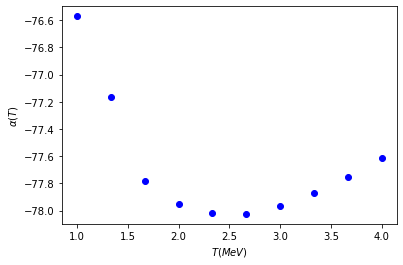

In [318]:


plt.plot(T, alfas, 'bo', )
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\alpha(T)$')
plt.savefig('alfa.pdf')


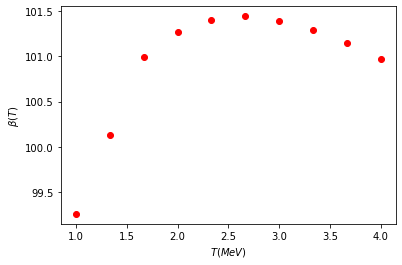

In [319]:
plt.plot(T, betas, 'ro')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\beta(T)$')
plt.savefig('beta.pdf')

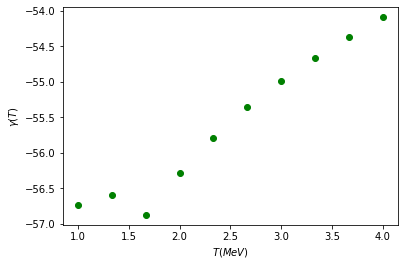

In [320]:
plt.plot(T, gammas, 'go')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\gamma(T)$')
plt.savefig('gamma.pdf')

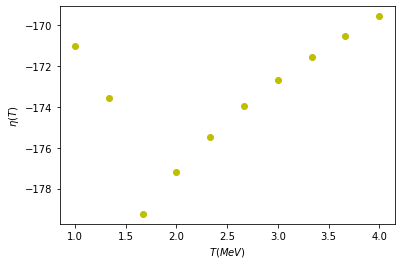

In [321]:
plt.plot(T, etas, 'yo')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\eta(T)$')
plt.savefig('eta.pdf')

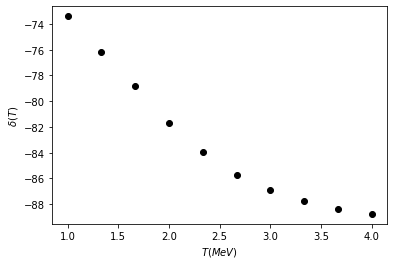

In [322]:
plt.plot(T, deltas, 'ko')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\delta(T)$')
plt.savefig('delta.pdf')

In [ ]:
element_file = pd.read_csv('63Zn'+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)


element_file.dropna(subset = ['jp'], inplace=True) #Hay que considerar este estado base?
element_file.dropna(subset = ['energy'], inplace=True)

element_file['jp'][1:] = element_file['jp'][1:].str.replace('+', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('-', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('(', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace(')', '')

element_file['jp'][1:]

In [ ]:

import fractions


for i in range(1, len(element_file['jp'][1:])+1):
    
    element_file['jp'][1:][i] = list(element_file['jp'][1:][i])
    
    
    if len(element_file['jp'][1:][i]) == 0 or element_file['jp'][1:][i] == [' ']:
        
        element_file['jp'][1:][i] = 0
        print(type(element_file["jp"][1:][i]))
        print(f'{i} {element_file["jp"][1:][i]}      {element_file["energy"][1:][i]}')
        continue
    
    if ' ' in element_file['jp'][1:][i]:
        
        element_file['jp'][1:][i].remove(' ')
        
        
        while len(element_file['jp'][1:][i]) > 4:
            
            element_file['jp'][1:][i].pop(0)
            
            
    element_file["jp"][1:][i] = ''.join([str(elem) for elem in element_file["jp"][1:][i]])
    element_file["jp"][1:][i] = float(fractions.Fraction(element_file["jp"][1:][i]))
        
    print(type(element_file['jp'][1:][i]))
    print(f'{i} {element_file["jp"][1:][i]} {element_file["energy"][1:][i]}')
    
element_file['jp'] = pd.to_numeric(element_file['jp'], errors='coerce')
element_file['energy'] = pd.to_numeric(element_file['energy'], errors='coerce')

In [ ]:
g_t(element_file['energy'][1:]/1000, element_file['jp'][1:], 3.5)

In [ ]:


element_file = pd.read_csv('64Zn'+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6', 'elect.quadrupole ', 'unc.7'], comment=',', header=None)


element_file.dropna(subset = ['jp'], inplace=True) #Hay que considerar este estado base?
element_file.dropna(subset = ['energy'], inplace=True)


element_file['jp'][1:] = element_file['jp'][1:].str.replace('+', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('-', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('(', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace(')', '')


element_file["jp"][1:] = element_file["jp"][1:].astype(str)



for i in range(1, len(element_file['jp'][1:]) + 1):
    
    #print(f'{i}    {element_file["jp"][1:][i]}')
    
    #numeric_filter = filter(str.isdigit, element_file['jp'][1:][i])
    
    if element_file['jp'][1:][i] == ' ':
        #print(type(element_file['jp'][1:][i]))
        #print(element_file['jp'][1:][i])
        element_file['jp'][1:][i] = 0
        print(type(element_file['jp'][1:][i]))
        print(f'{i} {element_file["jp"][1:][i]}')
        continue
        
    
    if type(element_file['jp'][1:][i]) == str:
        
        numeric_filter = filter(str.isdigit, element_file['jp'][1:][i])
        element_file['jp'][1:][i] = "".join(numeric_filter)
        
        element_file['jp'][1:][i] = list(element_file['jp'][1:][i])
        
        while len(element_file['jp'][1:][i]) > 2:
            
            element_file['jp'][1:][i].pop(0)
            
        element_file['jp'][1:][i] = int(element_file['jp'][1:][i][0])
        
    print(type(element_file['jp'][1:][i]))
    print(f'{i}  {element_file["jp"][1:][i]}')
        #element_file['jp'][1:][i].pop(0)
    
    
     
  
    

In [ ]:
element_file['jp'][1:]

In [ ]:
element_file['jp'] = pd.to_numeric(element_file['jp'], errors='coerce')
element_file['jp'][2:]

In [ ]:
for j in element_file['jp'][1:]:
    print(f'{j}   {type(j)}')

In [ ]:
g_t(element_file['energy'][2:]/1000, element_file['jp'][2:], 2)

In [ ]:
element_file['jp'][2:]

In [ ]:
g_t(element_file['energy'][1:]/1000, element_file['jp'][1:])

In [ ]:
for i in range(1, len(element_file['jp'][1:])+1):
    
    element_file['jp'][1:][i] = list(element_file['jp'][1:][i])
    
    
    if len(element_file['jp'][1:][i]) == 0 or element_file['jp'][1:][i] == [' ']:
        
        element_file['jp'][1:][i] = 0
        print(type(element_file["jp"][1:][i]))
        print(f'{i} {element_file["jp"][1:][i]}')
        continue
    
    if ' ' in element_file['jp'][1:][i]:
        
        element_file['jp'][1:][i].remove(' ')
        
    if ':' in element_file['jp'][1:][i]:
        
        element_file['jp'][1:][i].remove(':')
        
        
    while len(element_file['jp'][1:][i]) > 2:
            
        element_file['jp'][1:][i].pop(0)
                        
    
    print(type(element_file['jp'][1:][i]))
    print(f'{i} {element_file["jp"][1:][i]}')
    
#element_file['jp'] = pd.to_numeric(element_file['jp'], errors='coerce')
#element_file['energy'] = pd.to_numeric(element_file['energy'], errors='coerce')



In [ ]:
len(element_file['jp'][1:][94])

In [ ]:
element_file['jp'] = pd.to_numeric(element_file['jp'], errors='coerce')
element_file['energy'] = pd.to_numeric(element_file['energy'], errors='coerce')

In [ ]:
element_file['jp'][1:]

In [ ]:
a_string = "!1a2;b3c' ''? 4"

numeric_filter = filter(str.isdigit, a_string)
numeric_string = "".join(numeric_filter)

print(numeric_string)
type(numeric_string)

In [ ]:
print(element_file["jp"][1:])


In [ ]:
ejemplona['jp'][1:] = pd.to_numeric(ejemplona['jp'][1:], errors='coerce')

In [ ]:
ejemplona['jp'][1:]

In [190]:

import pandas as pd
import numpy as np

def g_t(E, J, T):
    
    suma = 0
    contador = 0
    
    for e, j in zip(E, J):
        
        suma += (2*j + 1.)*np.exp(-e/T)
        print(suma)
        
        contador += 1
    
    return (suma, contador )



In [212]:

'''Convert a csv file to a xlsx file'''


import pandas as pd

ej = '184W'

#data = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+ej+'.csv', error_bad_lines=False)
data = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+ej+'.csv', names=['Z', 'N', 'symbol', ' energy [keV] ', 'unc', ' jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)


#data.dropna(subset = [' jp'], inplace=True) #Hay que considerar este estado base?
data.dropna(subset = [' energy [keV] '], inplace=True)


data[' jp'][1:] = data[' jp'][1:].str.replace('-', '')
data[' jp'][1:] = data[' jp'][1:].str.replace('+', '')
data[' jp'][1:] = data[' jp'][1:].str.replace('(', '')
data[' jp'][1:] = data[' jp'][1:].str.replace(')', '')
data[' jp'][1:] = data[' jp'][1:].str.replace(':', '')
data[' jp'][1:] = data[' jp'][1:].str.replace('LE', '')
data[' jp'][1:] = data[' jp'][1:].str.replace('TO', '')
data[' jp'][1:] = data[' jp'][1:].str.replace('to', '')
data[' jp'][1:] = data[' jp'][1:].str.replace('G', '')
data[' jp'][1:] = data[' jp'][1:].str.replace('L', '')



for i in range(1, len(data[' jp'][1:]) + 1):
    
    #print(f'*{i}')
    #print(data[' jp'][0:][i])
    #print('\n')
    
    #data[' jp'][0:][i] = list(data[' jp'][0:][i])
    
    
    if len(data[' jp'][1:][i]) == 0 or data[' jp'][1:][i] == ' ':
        
        data[' jp'][1:][i] = 0
       
        
    
    #data[' jp'][0:][i] = list(data[' jp'][0:][i])

    
#data[' jp'] = pd.to_numeric(data[' jp'], errors='coerce')



data_excl = data.to_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+ej+'.xlsx')  
data_csv = data.to_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv_modificados/'+ej+'.csv') 

In [ ]:

'''
data = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+'63Zn'+'.csv', names=['Z', 'N', 'symbol', ' energy [keV] ', 'unc', ' jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)


for i in range(1, len(data[' jp'])):
    print(data[' jp'][1:][i])
'''

In [ ]:

''''
data_try = pd.read_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+ej+'.xlsx')

for i in range(1, len(data_try[' jp'])):
    print(data_try[' jp'][1:][i])
    print(type(data_try[' jp'][1:][i]))
 
    
    
    
    
    
    if type(data[' jp'][1:][i]) != int:
        print(data[' jp'][1:][i])
        print(type(data[' jp'][1:][i]))
        
'''        

In [213]:


data_clean = pd.read_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+ej+'.xlsx')

data_clean[' energy [keV] '][1:] = pd.to_numeric(data_clean[' energy [keV] '][1:], errors='coerce')
#data_clean[' jp'][1:] = pd.to_numeric(data[' jp'][1:], errors='coerce')
data_clean[' jp'][1:] = data_clean[' jp'][1:].astype('int64')

#data_clean.dropna(subset = [' energy [keV] '], inplace=True) 
#data_clean.dropna(subset = [' jp'], inplace=True) 

data_clean

<ipython-input-213-62b97274cabd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[' energy [keV] '][1:] = pd.to_numeric(data_clean[' energy [keV] '][1:], errors='coerce')
/Users/sebastianquinteroarias/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-213-62b97274cabd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Unnamed: 0,Z,N,symbol,energy [keV],unc,jp,half-life operator,half_life,unc.1,...,decay %.1,unc.4,decay.2,decay %.2,unc.5,isospin,magn. dipole,unc.6,elect.quadrupole,unc.7
0,0,Z,N,symbol,energy,unc,jp,half-life operator,half_life,unc,...,decay %,unc,decay,decay %,unc,isospin,magn. dipole,unc,elect. quadrupole,unc
1,1,74,110,W,0,,0,,STABLE,,...,,,,,,,,,,
2,2,74,110,W,111.217,0.0004,2,,1.251,12,...,,,,,,,0.578,,-1.87,
3,3,74,110,W,364.069,0.008,4,,46.3,+25-13,...,,,,,,,1.17,,,
4,4,74,110,W,748.32,0.012,6,,5.75,18,...,,,,,,,1.79,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,74,110,W,6580.8,0.2,0,,,,...,,,,,,,,,,
255,255,74,110,W,6622.7,0.4,0,,,,...,,,,,,,,,,
256,256,74,110,W,6760.1,1,1,,,,...,,,,,,,,,,
257,257,74,110,W,11900,170,0,,2.90,17,...,,,,,,,,,,


In [ ]:
'''
for indx, i in enumerate(data_clean[' energy [keV] '][1:]):
    
    if type(i) == str:
        print('Cadena\n')
        
    print(f'{indx}  {i}  {type(i)}')
'''


In [ ]:

'''
for indx, i in enumerate(data_clean[' jp'][1:]):
    
    if type(i) == str:
        print('Cadena')
    
    
    print(f'{indx}   {i}  {type(i)}')
'''

In [214]:
#g_t(data_clean[' energy [keV] ']/1000, data_clean[' jp'], 2)
g_t(data_clean[' energy [keV] '][1:]/1000, data_clean[' jp'][1:], 2)

1.0
5.729545988760758
13.231699223750997
22.173968200024376
25.356841723276208
25.962617722191325
30.195675661845307
33.04966536856884
35.89140216255936
40.99680611533918
44.79777555180428
53.887215951059595
56.52010808431433
62.30585099631632
68.06290146875932
68.57919697030685
73.17222531835618
77.73091201688426
80.23090996828496
83.66382117344564
86.10853461058532
92.41652002878176
98.62862223053418
103.8454800627424
110.92550692004113
114.19382384009117
118.36790635538215
120.64827681586206
126.54395373909328
127.88286432628192
128.328992046391
130.55896155572486
131.88840087469757
138.50479284051565
138.94060454472316
143.697928295031
144.1289055340386
148.83272707802217
149.25727304249693
150.52549043773482
155.95546450148697
159.697854997631
160.10964160791985
162.167710089055
162.575134442195
164.5995942683023
164.99680036410246
173.27911469350082
175.2354694283106
177.95038308092617
178.33308456831193
184.8247125510413
185.93089216406236
187.75842688651264
193.19492541673625
1

(322.3399910948329, 258)

In [ ]:
#############################

In [ ]:
#############################

In [ ]:
#############################

In [ ]:
#############################

In [215]:

import pandas as pd


ej = '185W'

#element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+ej+'.csv',  error_bad_lines=False )



element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+ej+'.csv', names=['Z', 'N', 'symbol', ' energy [keV] ', 'unc', ' jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)
           

element_file.dropna(subset = [' jp'], inplace=True) #Hay que considerar este estado base?
element_file.dropna(subset = [' energy [keV] '], inplace=True)

element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('+', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('-', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('(', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace(')', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace(':', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('&', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('[', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace(']', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('E', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('G', '')
element_file[' jp'][1:] = element_file[' jp'][1:].str.replace('L', '')

for i in range(1, len(element_file[' jp'][1:]) + 1):
    
    element_file[' jp'][1:][i] = list(element_file[' jp'][1:][i])
    
    
    
    if len(element_file[' jp'][1:][i]) == 0 or element_file[' jp'][1:][i] == [' ']:
        
        element_file[' jp'][1:][i] = 0
        #print(type(element_file[' jp'][0:][i]))
        #print(f'{i} {element_file[' jp'][0:][i]}      {element_file["energy"][1:][i]}')
        continue
    
    
    #if ' ' in element_file[' jp'][0:][i]:
        
        #element_file[' jp'][0:][i].remove(' ') 
            
                
    while len(element_file[' jp'][1:][i]) > 4:
        
        element_file[' jp'][1:][i].pop(0)
            
            
    element_file[' jp'][1:][i] = ''.join([str(elem) for elem in element_file[' jp'][1:][i]])
    #element_file[' jp'][0:][i] = float(fractions.Fraction(element_file[' jp'][1:][i]))
        
    #print(type(element_file[' jp'][1:][i]))
    #print(f'{i} {element_file[' jp'][1:][i]} {element_file["energy"][1:][i]}')
    
#element_file[' jp'] = pd.to_numeric(element_file[' jp'], errors='coerce')
#element_file[' energy [keV] '] = pd.to_numeric(element_file[' energy [keV] '], errors='coerce')

element_file_clear = element_file.to_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+ej+'.xlsx')
data_csv = element_file.to_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv_modificados/'+ej+'.csv') 


In [216]:

element_file_up = pd.read_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+ej+'.xlsx')

element_file_up[' energy [keV] '] = pd.to_numeric(element_file_up[' energy [keV] '], errors='coerce')
#element_file[' jp'] = pd.to_numeric(element_file[' jp'], errors='coerce')

#element_file_up.dropna(subset = [' energy [keV] '], inplace=True) 
#element_file.dropna(subset = [' jp'], inplace=True) 

element_file_up

,Unnamed: 0,Z,N,symbol,energy [keV],unc,jp,half-life operator,half_life,unc.1,...,decay %.1,unc.4,decay.2,decay %.2,unc.5,isospin,magn. dipole,unc.6,elect.quadrupole,unc.7
0,0,Z,N,symbol,NaN,unc,jp,half-life operator,half_life,unc,...,decay %,unc,decay,decay %,unc,isospin,magn. dipole,unc,elect. quadrupole,unc
1,1,74,111,W,0.000,,3/2,,75.1,3,...,,,,,,,,,,
2,2,74,111,W,23.547,0.018,1/2,,,,...,,,,,,,,,,
3,3,74,111,W,65.854,0.016,5/2,,,,...,,,,,,,,,,
4,4,74,111,W,93.295,0.02,3/2,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,343,74,111,W,3200.360,0.21,5/2,,,,...,,,,,,,,,,
344,344,74,111,W,3241.560,0.21,5/2,,,,...,,,,,,,,,,
345,345,74,111,W,3249.460,0.21,5/2,,,,...,,,,,,,,,,
346,346,74,111,W,3262.970,0.15,5/2,,,,...,,,,,,,,,,


In [ ]:
'''
for indx, i in enumerate(element_file_up[' jp'][:]):
    print(f'{indx}   {i}')
'''

In [217]:

import fractions


for i in range(1, len(element_file_up[' jp'][1:]) + 1):
    
    
    element_file_up[' jp'][1:][i] = float(fractions.Fraction(element_file_up[' jp'][1:][i]))
    #print(type(element_file_up[' jp'][0:][i]))
    #print('\n')
    #print(type(element_file_up[' energy [keV] '][0:][i]))
    
element = element_file_up.to_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+ej+'.xlsx')

In [ ]:

'''
for indx, i in enumerate(element_file_up[' energy [keV] '][1:]):
    
    if type(i) == str:
        print('Cadena\n')
        
    print(f'{indx}    {i}  {type(i)}')
'''

In [ ]:

'''
for indx, i in enumerate(element_file_up[' jp'][1:]):
    
    if type(i) == str:
        print('Cadena\n')
        
    print(f'{indx}  {i}  {type(i)}')
'''


In [218]:
g_t(element_file_up[' energy [keV] '][1:]/1000, element_file_up[' jp'][1:], 2)

4.0
5.976591072903917
11.782246227795625
15.59994131851822
22.93445084409007
28.396480591187345
39.26874666423765
46.351279165602314
54.94975615219437
61.719353042891875
73.27364920177543
81.49821161333415
90.94719020180641
98.76641245106119
107.79058350289378
110.66126472469803
119.09219104522492
126.08292179529018
128.85984724160332
131.5840732689763
135.65861983853614
142.41127032851736
143.08125529830602
145.73226175035214
148.3770456515968
152.31538626005184
156.16302432043662
156.7993784901617
159.32760825746632
159.9585763400478
162.42410034042115
163.0394897655364
166.71657164187204
171.60290179439912
172.8125773412579
174.01777933259456
182.42471743596627
184.80781076323058
188.37190328451535
193.08380478274248
196.61102282147655
198.9558093405692
202.4645580091185
205.965770971817
209.45039260853702
211.7565769558688
214.05746317438548
214.63239719012805
218.06308054180258
223.78088612792678
224.3520951917756
226.60822159332062
229.98897798584053
234.481622655674
235.58952913

(697.110884262108, 347)

<ipython-input-2-9cbde9040fbd>:10: RuntimeWarning: divide by zero encountered in true_divide
  b = h*c/(wav*k*T)
<ipython-input-2-9cbde9040fbd>:11: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
<ipython-input-2-9cbde9040fbd>:11: RuntimeWarning: invalid value encountered in multiply
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


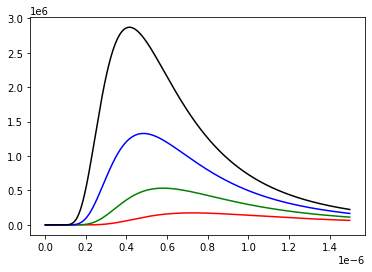

In [2]:

import matplotlib.pyplot as plt
import numpy as np

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck_l(wav, T):
    a = 8.0*h*c*np.pi
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

def planck_f(fre, T):
    a = 8.0*np.pi*h*(fre**3)
    b = h*fre/(k*T)
    intensity = a/ ( (c**3) * (np.exp(b)) - 1.0 )
    return intensity
    

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(0, 1.5e-6, 1e-9) 
#frequencies = np.arange(0, 4.0e14, 1e17) 

# intensity at 4000K, 5000K, 6000K, 7000K
intensity4000_l = planck_l(wavelengths, 4000.)
intensity5000_l = planck_l(wavelengths, 5000.)
intensity6000_l = planck_l(wavelengths, 6000.)
intensity7000_l = planck_l(wavelengths, 7000.)

'''
intensity4000_f = planck_f(frequencies, 4000.)
intensity5000_f = planck_f(frequencies, 5000.)
intensity6000_f = planck_f(frequencies, 6000.)
intensity7000_f = planck_f(frequencies, 7000.)
'''


#plt.plot(wavelengths*1e9, intensity4000_l, 'r-') 
# plot intensity4000 versus wavelength in nm as a red line

plt.plot(wavelengths, intensity4000_l, 'r-') 
plt.plot(wavelengths, intensity5000_l, 'g-') # 5000K green line
plt.plot(wavelengths, intensity6000_l, 'b-') # 6000K blue line
plt.plot(wavelengths, intensity7000_l, 'k-') # 7000K black line


# show the plot
plt.show()




<ipython-input-193-d4fec01b4e0f>:10: RuntimeWarning: divide by zero encountered in true_divide
  b = h*c/(wav*k*T)
<ipython-input-193-d4fec01b4e0f>:11: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
<ipython-input-193-d4fec01b4e0f>:11: RuntimeWarning: invalid value encountered in multiply
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


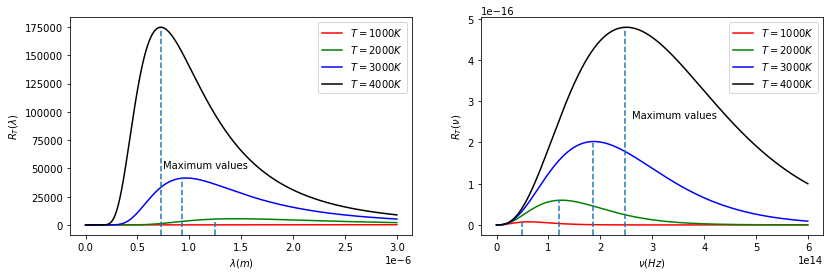

In [193]:

import matplotlib.pyplot as plt
import numpy as np

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck_l(wav, T):
    a = 8.0*h*c*np.pi
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

def planck_f(fre, T):
    a = 8.0*np.pi*h*(fre**3)
    b = h*fre/(k*T)
    intensity = a/ ( (c**3) * (np.exp(b)) - 1.0 )
    return intensity
    

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(0, 3.0e-6, 1e-9) 
frequencies = np.arange(0, 6.0e14, 1.0e12)
#frequencies = np.arange(0, 4.0e14, 1e17) 

plt.figure(1, figsize=(13.5, 4))

# intensity at 4000K, 5000K, 6000K, 7000K
intensity1000_l = planck_l(wavelengths, 1000.)
intensity2000_l = planck_l(wavelengths, 2000.)
intensity3000_l = planck_l(wavelengths, 3000.)
intensity4000_l = planck_l(wavelengths, 4000.)


intensity1000_f = planck_f(frequencies, 1000.)
intensity2000_f = planck_f(frequencies, 2000.)
intensity3000_f = planck_f(frequencies, 3000.)
intensity4000_f = planck_f(frequencies, 4000.)



#plt.plot(wavelengths*1e9, intensity4000_l, 'r-') 
# plot intensity4000 versus wavelength in nm as a red line

plt.subplot(1,2,1) 
plt.plot(wavelengths, intensity1000_l, 'r-', label= r'$T=1000K$') 
plt.plot(wavelengths, intensity2000_l, 'g-', label= r'$T=2000K$') # 5000K green line
plt.plot(wavelengths, intensity3000_l, 'b-', label= r'$T=3000K$') # 6000K blue line
plt.plot(wavelengths, intensity4000_l, 'k-', label= r'$T=4000K$') # 7000K black line

plt.axvline(x=0.73e-6, ymax = 9.52e-1, ls='--')
plt.axvline(x=0.93e-6, ymax = 2.67e-1, ls='--')
plt.axvline(x=1.25e-6, ymax = 0.6e-1, ls='--')
#plt.axvline(x=0.5e14, ymax = 0.6e-1, ls='--')

plt.text(0.75e-6, 50000, r'Maximum values')

plt.xlabel(r'$\lambda(m)$')
plt.ylabel(r'$R_{T}(\lambda)$')


plt.legend()

# show the plot

plt.subplot(1,2,2) 
plt.plot(frequencies, intensity1000_f, 'r-', label= r'$T=1000K$') 
plt.plot(frequencies, intensity2000_f, 'g-', label= r'$T=2000K$')
plt.plot(frequencies, intensity3000_f, 'b-', label= r'$T=3000K$') 
plt.plot(frequencies, intensity4000_f, 'k-', label= r'$T=4000K$') 



plt.axvline(x=2.47e14, ymax = 9.52e-1, ls='--')
plt.axvline(x=1.85e14, ymax = 4.2e-1, ls='--')
plt.axvline(x=1.20e14, ymax = 1.6e-1, ls='--')
plt.axvline(x=0.5e14, ymax = 0.6e-1, ls='--')


plt.text(2.6e14, 2.6e-16, r'Maximum values')

plt.xlabel(r'$\nu(Hz)$')
plt.ylabel(r'$R_{T}(\nu)$')

plt.legend()


plt.savefig('juntas.png')

plt.show()




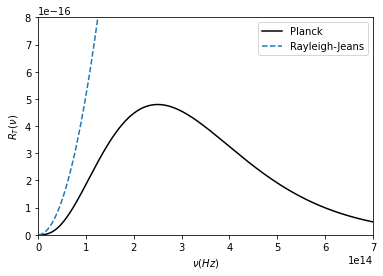

In [266]:


def rl(fre, T):

    return 8*np.pi*(fre**2)*k*T/(c**3)

freq = np.arange(0, 7e14, 1.0e12)

intensity4000_al = planck_f(freq, 4000)
intensity4000_rl = rl(freq, 4000)

fig, ax = plt.subplots() 

#draw = plt.Circle( (0, 0), 2e11, fill = False )

#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.plot(freq, intensity4000_al, 'k-', label='Planck') 
ax.plot(freq, intensity4000_rl, ls='--', label= 'Rayleigh-Jeans')

#ax.add_artist( draw )

#plt.add_artist(draw)
#plt.fill_between(freq, intensity4000_al)
#plt.text(2.3e14, 2e-16, r'$R_{T} = \sigma T^{4}$', bbox=props)
ax.set_xlim(0, 7e14)
ax.set_ylim(0, 0.8e-15)
ax.legend()
ax.set_xlabel(r'$\nu(Hz)$')
ax.set_ylabel(r'$R_{T}(\nu)$')

fig.savefig('catastrofe.jpg')

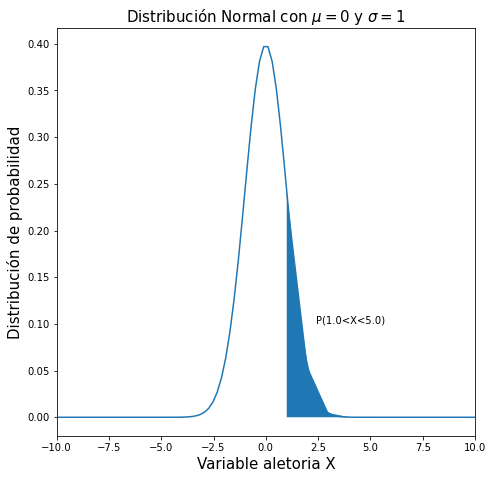

In [297]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#
# Values of random variable
#
x = np.linspace(-10, 10, 100)
#
plt.figure(figsize=(7.5,7.5))
#
# Normal distribution with mean 0 and std as 1
#
plt.plot(x, stats.norm(0, 1).pdf(x))
#
# Normal distribution with mean 1 and std as 0.75
#
#plt.plot(x, stats.norm(1, 0.75).pdf(x))
#
# Normal distribution with mean 2 and std as 1.5
#
#plt.plot(x, stats.norm(2, 1.5).pdf(x))

a = np.arange(1.0, 5.0)
plt.fill_between( a, stats.norm(0, 1).pdf(a) )
plt.xlim(-10, 10)
plt.title(r'Distribución Normal con $\mu = 0$ y $\sigma = 1$', fontsize='15')
plt.xlabel('Variable aletoria X', fontsize='15')
plt.ylabel('Distribución de probabilidad', fontsize='15')

plt.text(2.4, 0.10, 'P(1.0<X<5.0)')

#px=np.arange(0,500,10)
#plt.fill_between(px,iq.pdf(px),color='r')

plt.savefig('normal_propr.jpg')

plt.show()

In [1]:

import pandas as pd
import matplotlib.pyplot as plt


light_nuclei = {'22Na' : [7.91, 0, 0, 3.13, -2.00, 1.9, 11, 11, 2.23], '23Na' : [8.11, 0, 2.67, 3.68, -0.40, 2.0, 12, 11, 2.68],
                '25Na' : [8.10, 0, 1.80, 4.03, -0.70, 2.1, 14, 11, 1.91], '24Mg' : [8.25, 2.46, 2.67, 3.32, 2.80, 2.0, 12, 12, 2.18], '25Mg' : [8.22, 2.46, 0, 3.85, -1.00, 2.15, 13, 12, 2.12],
                '26Mg' : [8.33, 2.46, 1.80, 4.08, 0.50, 2.25, 14, 12, 2.07], '27Mg' : [8.26, 2.46, 0, 4.00, -0.80, 2.25, 15, 12, 2.04], '26Al' : [8.15, 0, 0, 3.65, -1.80, 2.0, 13, 13, 1.95],
                '27Al' : [8.33, 0, 1.80, 3.45, -0.35, 2.0, 14, 13, 2.08], '28Al': [8.31, 0, 0, 0, -0.70, 2.2, 15, 13, 1.50], '29Al' : [8.35, 0, 1.67, 4.08, -0.65, 2.2, 16, 13, 1.88],
                '28Si' : [8.45, 2.09, 1.80, 3.05, 3.20, 2.0, 14, 14, 2.09], '29Si' : [8.45, 2.09, 0, 3.57, 0.75, 2.1, 15, 14, 1.91], '30Si' : [8.52, 2.09, 1.67, 3.81, 1.10, 2.25, 16, 14, 2.04],
                '31Si' : [8.46, 2.09, 0, 4.05, 0.40, 2.15, 17, 14, 1.79], '30P' : [8.35, 0, 0, 3.47, -1.00, 1.9, 15, 15, 1.89], '31P' : [8.48, 0, 1.67, 3.87, 0.40, 2.0, 16, 15, 1.78],
                '32P' : [8.46, 0, 0, 3.45, -1.75, 2.0, 17, 15, 1.96], '32S' : [8.49, 1.62, 1.67, 3.39, 1.75, 2.0, 16, 16, 2.05], '33S' : [8.50, 1.62, 0, 4.36, 0.0, 2.2, 17, 16, 1.68],
                '34S' : [8.58, 1.62, 1.86, 4.12, 1.84, 2.2, 18, 16, 1.77], '34Cl' : [8.40, 0, 0, 3.72, -1.61, 2.15, 17, 17, 1.92], '35Cl' : [8.52, 0, 1.86, 4.11, 0.31, 2.2, 18, 17, 1.76],
                '37Cl' : [8.57, 0, 2.04, 4.88, 1.15, 2.1, 20, 17, 1.40], '38Cl' : [8.50, 0, 0, 5.41, -0.99, 2.2, 21, 17, 1.31],
                '36Ar': [8.52, 1.62, 1.86, 4.03, 2.46, 2.1, 18, 18, 1.69], '37Ar' : [8.53, 1.62, 0, 4.41, -0.34, 2.35, 19, 18, 1.73], '38Ar' : [8.61, 1.62, 2.04, 4.80, 0.91, 2.5, 20, 18, 1.73],
                '39Ar': [8.56, 1.62, 0, 5.34, -0.04, 2.4, 21, 18, 1.44], '40Ar' : [8.59, 1.62, 1.64, 6.70, 1.00, 2.65, 22, 18, 1.28], '41Ar' : [8.53, 1.62, 0, 5.74, -0.50, 2.55, 23, 18, 1.43],
                '38K' : [8.44, 0, 0, 4.29, -0.94, 2.15, 19, 19, 1.59], '39K' : [8.56, 0, 2.04, 4.68, 0.95, 2.2, 20, 19, 1.50], '40K' : [8.54, 0, 0, 5.34, -0.90, 2.2, 21, 19, 1.31], 
                '41K' : [8.58, 0, 1.64, 5.78, -1.48, 2.7, 19, 22, 1.55], '42K' : [8.55, 0, 0, 5.56, -2.27, 2.6, 23, 19, 1.49], '41Ca' : [8.55, 1.83, 0, 5.44, -0.50, 2.5, 21, 20, 1.52],
                '42Ca': [8.62, 1.83, 1.64, 6.58, 0.50, 2.75, 22, 20, 1.39], '43Ca': [8.60, 1.83, 0, 6.91, -1.45, 2.9, 23, 20, 1.37], '44Ca' : [8.66, 1.83, 1.44, 6.34, 0.30, 2.8, 24, 20 ,1.43],
                '45Ca': [8.63, 1.83, 0, 7.11, -0.44, 2.75, 25, 20, 1.23], '41Sc': [8.37, 0, 2.04, 5.63, 0.20, 2.5, 20, 21, 1.41], '43Sc' : [8.53, 0, 1.64, 6.55, -0.61, 2.65, 22, 21, 1.31],
                '44Sc' : [8.56, 0, 0, 6.97, -1.88, 2.65, 23, 21, 1.20], '45Sc' : [8.62, 0, 1.44, 7.59, -1.45, 2.9, 24, 21, 1.24], '46Sc' : [8.24, 0, 0, 6.33, -2.28, 2.75, 25, 21, 1.35],
                '47Sc' : [8.66, 0, 1.54, 7.08, -1.10, 2.85, 26, 21, 1.28], '45Ti' : [8.55, 1.73, 0, 6.84,-0.83, 2.8, 23, 22, 1.30], '46Ti' : [8.66, 1.73, 1.44, 6.93, 1.14, 2.7, 24, 22, 1.23],
                '47Ti' : [8.66, 1.73, 0, 5.97, -1.00, 2.8, 25, 22, 1.47], '48Ti' : [8.72, 1.73, 1.54, 6.93, 0.52, 2.85, 25, 22, 1.32], '49Ti' : [8.71, 1.73, 0 , 6.11, -0.83, 2.8, 27, 22, 1.30],
                '47V' : [8.58, 0, 1.44, 6.79, -1.13, 2.8, 24, 23, 1.32], '48V' : [8.62, 0, 0, 6.77, -1.28, 2.6, 25, 23, 1.14], '49V' : [8.68, 0, 1.54, 6.76, -1.33, 2.9, 26, 23, 1.35],
                '50V' : [8.69, 0, 0, 6.67, -1.48, 2.65, 27, 23, 1.19], '51V' : [8.74, 0, 1.30, 6.72, -0.15, 2.7, 28, 23, 1.18], '50Cr' : [8.70, 1.35, 1.54, 6.54, 0.43, 2.85, 26, 24, 1.34],
                '51Cr': [8.71, 1.35, 0, 6.44, -0.78, 2.8, 27, 24, 1.32], '52Cr' : [8.77, 1.35, 0, 6.15, 0.02, 2.9, 28, 24, 1.43], '53Cr' : [8.76, 1.35, 0, 5.88, -0.65, 2.8, 29, 24, 1.40],
                '54Cr': [8.78, 1.35, 1.27, 6.96, 0.65, 2.9, 30, 24, 1.24], '55Cr' : [8.73, 1.35, 0, 7.52, -0.47, 2.9, 31, 24, 1.13], '51Mn' : [8.63, 0, 1.54, 6.29, 0.26, 2.6, 26, 25, 1.22],
                '52Mn': [8.67, 0, 0, 6.29, 0.26, 2.6, 27, 25, 1.22], '53Mn' : [8.73, 0, 1.30, 5.87, 0.50, 2.45, 28, 25, 1.21], '54Mn' : [8.74, 0, 0, 6.21, -1.49, 2.7, 29, 25, 1.27],
                '55Mn': [8.76, 0, 1.27, 7.41, -0.50, 2.9, 30, 25, 1.14], '56Mn' : [8.74, 0, 0, 7.41, -0.50, 2.9, 31, 25, 1.14], '54Fe': [8.74, 1.54, 1.30, 6.13, 0.60, 2.9, 28, 26, 1.39],
                '55Fe': [8.75, 1.54, 0, 5.76, -1.25, 3.0, 29, 26, 1.53], '56Fe' : [8.79, 1.54, 1.27, 6.75, 0.80, 2.9, 30, 26, 1.26], '57Fe' : [8.77, 1.54, 0, 6.91, -1.60, 3.2, 31, 26, 1.37],
                '58Fe': [8.79, 1.54, 1.29, 7.65, 0.60, 3.05, 32, 26, 1.17], '59Fe' : [8.75, 1.54, 0, 7.33, -1.20, 3.15, 33, 26, 1.27], '56Co' : [8.69, 0, 0, 5.51, -0.96, 2.6, 29, 27, 1.31],
                '57Co': [8.74, 0, 1.27, 5.95, 0.05, 2.7, 30, 27, 1.27], '59Co' : [8.77, 0, 1.29, 8.04, -0.40, 3.0, 32, 27, 1.06], '60Co' : [8.75, 0, 0, 7.23, -1.56, 2.9, 33, 27, 1.14],
                '58Ni': [8.73, 1.20, 1.27, 5.44, -0.17, 2.95, 30, 28, 1.59], '59Ni' : [8.74, 1.20, 0, 5.97, -1.75, 3.1, 31, 28, 1.51], '60Ni' : [8.78, 1.20, 1.29, 6.54, 0.01, 3.05, 32, 28, 1.36],
                '61Ni': [8.76, 1.20, 0, 6.94, -1.25, 3.1, 33, 28, 1.29], '62Ni' : [8.79, 1.20, 1.41, 7.59, 0.77, 3.0, 34, 28, 1.13], '64Ni' : [8.78, 1.20, 1.50, 8.52, 1.20, 3.0, 36, 28, 0.99],
                '62Cu': [8.72, 0, 0, 7.19, -1.00, 2.75, 33, 29, 1.06], '63Cu' : [8.75, 0, 1.41, 8.88, -0.25, 3.1, 34, 29, 0.98], '64Cu' : [8.74, 0, 0, 8.09, -1.25, 2.9, 35, 29, 0.995],
                '65Cu': [8.76, 0, 1.50, 8.70, 0.03, 3.05, 36, 29, 0.97], '66Cu' : [8.73, 0, 0, 8.33, -1.02, 2.9, 37, 29, 0.94]}
    


In [8]:

'''
for l_n in light_nuclei:
    
    if (light_nuclei[l_n][6] + light_nuclei[l_n][7])%2 == 0:
        
        element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+l_n+'.csv', error_bad_lines=False)
'''        
        

"\nfor l_n in light_nuclei:\n    \n    if (light_nuclei[l_n][6] + light_nuclei[l_n][7])%2 == 0:\n        \n        element_file = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_csv/'+l_n+'.csv', error_bad_lines=False)\n"

In [219]:


import fractions

el = '185W'

element_file_up = pd.read_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+el+'.xlsx')

'''
element_file_up = pd.read_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_xlsx/'+el+'.xlsx', names=['Z', 'N', 'symbol', ' energy [keV] ', 'unc', ' jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', '   half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)
'''

for i in range(1, len(element_file_up[' jp'][1:]) + 1):
    
    element_file_up[' jp'][i] = float(fractions.Fraction(element_file_up[' jp'][i]))
    
    if element_file_up[' jp'][i] == 0.0:
        
        element_file_up[' jp'][i] = 0.5
        
    print(i)
    print(element_file_up[' jp'][i])
    print(type(element_file_up[' jp'][i]))
    
    
element_file_mod_xlsx = element_file_up.to_excel('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_completos_xlsx/'+el+'.xlsx')
element_file_mod_csv = element_file_up.to_csv('/Users/sebastianquinteroarias/Desktop/JupyterFolder/NuclearP/archivos_completos_csv/'+el+'+.csv') 
    


<ipython-input-219-661a3296190b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element_file_up[' jp'][i] = float(fractions.Fraction(element_file_up[' jp'][i]))
<ipython-input-219-661a3296190b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element_file_up[' jp'][i] = 0.5


1
1.5
<class 'float'>
2
0.5
<class 'float'>
3
2.5
<class 'float'>
4
1.5
<class 'float'>
5
3.5
<class 'float'>
6
2.5
<class 'float'>
7
5.5
<class 'float'>
8
3.5
<class 'float'>
9
4.5
<class 'float'>
10
3.5
<class 'float'>
11
6.5
<class 'float'>
12
4.5
<class 'float'>
13
5.5
<class 'float'>
14
4.5
<class 'float'>
15
5.5
<class 'float'>
16
1.5
<class 'float'>
17
5.5
<class 'float'>
18
4.5
<class 'float'>
19
1.5
<class 'float'>
20
1.5
<class 'float'>
21
2.5
<class 'float'>
22
4.5
<class 'float'>
23
0.5
<class 'float'>
24
1.5
<class 'float'>
25
1.5
<class 'float'>
26
2.5
<class 'float'>
27
2.5
<class 'float'>
28
0.5
<class 'float'>
29
1.5
<class 'float'>
30
0.5
<class 'float'>
31
1.5
<class 'float'>
32
0.5
<class 'float'>
33
2.5
<class 'float'>
34
3.5
<class 'float'>
35
0.5
<class 'float'>
36
0.5
<class 'float'>
37
6.5
<class 'float'>
38
1.5
<class 'float'>
39
2.5
<class 'float'>
40
3.5
<class 'float'>
41
2.5
<class 'float'>
42
1.5
<class 'float'>
43
2.5
<class 'float'>
44
2.5
<class 'float